# First limits

**Motivation:**  I just started running Sean's stats framework repo, but my limits for the 4b cateogry seemed *suspiciously* low (i.e, 10.4 when Sean + Shota were seeing 12-ish).

I saved the corresponding workspaces for these stats only studies, so now I'm just going to try to validate these histograms.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Start off w/ $\mathbb{\mathrm{P}}$ Db**

In [36]:
yr = 17
fDir = '../data/SeanFiles/Db_sort/pairAGraph/'
fName = f'pairAGraph_Db_sort_17_NN_100_bootstraps.root'

f_4b   = uproot.open(f'{fDir}/4b_ntag_pag/{fName}')

cols = ['m_hh','m_hh_cor','MDpT','kinematic_region', 'm_h1','m_h2','ntag_pag',
        'pT_h1','pT_h2','X_wt','X_wt_old','Xhh','abs_deta_hh',
        'NN_d24_weight_bstrap_med_17',
        'NN_d24_weight_bstrap_IQR_17',
        'NN_d24_weight_VRderiv_bstrap_med_17',
        'NN_d24_weight_VRderiv_bstrap_IQR_17']
bdf = f_4b['sig'].pandas.df(cols)

In [49]:
# Load in the pag files

physicsSample='SMNR'
mc = 'mc16d'
prodTag='JUN20'
nSelectedJets=5
pconfig='preLN_lr_0p003'

sname = f'../data/{physicsSample}_{mc}-{prodTag}-{nSelectedJets}jets_2b1jBucketBug/df_{pconfig}_3b_Db_sort.parquet'

scols = [c for c in cols if 'NN' not in c]
Db_cols = [f'Db_h{i}_j{j}' for i,j in product([1,2], [1,2])]
scols += ['bucket','mc_sf'] + Db_cols
sdf = pd.read_parquet(sname,columns=scols)
 
sdf = sdf[(sdf.ntag_pag == 4) & (sdf.bucket != 0)  & (sdf.abs_deta_hh < 1.5) & (sdf.kinematic_region <=2)]
sdf['minQ'] = np.min(sdf[Db_cols].values,axis=1)

**Next:** Load in the workspace (from Sean)

In [11]:
with open('../non-resonant-studies/test-stats-only-17.json') as jfile:
    ws = json.load(jfile)

In [13]:
ws.keys()

dict_keys(['channels', 'observations', 'measurements', 'version'])

Just doing 4b rn, channels is is list of len 1.

In [24]:
ws['channels'][0]['samples'][0]

{'name': 'signal174b',
 'data': [1e-20,
  1e-20,
  0.00675196610114639,
  0.032818998111139266,
  0.16897991947004978,
  0.4243446693141033,
  0.7648308504831208,
  0.9678005106481935,
  1.015687448996819,
  1.0394468434920308,
  1.0132676228401936,
  0.8819836116979669,
  0.7914839406365788,
  0.6735249879557808,
  0.5851349320475965,
  0.5097439977494584,
  0.42504225107035154,
  0.35465237438107877,
  0.2953870989013119,
  0.2692219989282201,
  0.2153204088074041,
  0.19325404845209526,
  0.14112572955264469,
  0.13149487530483306,
  0.11475112701326218,
  0.08844874417838611,
  0.07601860936524929,
  0.06989266551311601,
  0.05973410436294735,
  0.045093526563874775,
  0.04996659510235979,
  0.03611649633689318,
  0.02776566570067196,
  0.0260150234569565,
  0.019977519294632984,
  0.01514477694604821,
  0.01414838032850696,
  0.008947275989701353,
  0.005066700163062876,
  0.008562142522537286],
 'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None}]}

In [15]:
ws['observations']

[{'name': 'channel174b',
  'data': [6.19056893954016,
   69.99381719767905,
   269.2307076479883,
   617.7167457846208,
   882.863769236207,
   937.8356706404977,
   841.6771455926141,
   682.2195627147817,
   532.2920065777787,
   414.0957997419573,
   323.2798274087777,
   253.16939104081575,
   200.28794564945565,
   157.95670219565363,
   122.73118541185977,
   99.51471206730093,
   82.07252007760599,
   66.75552094999875,
   54.24420557200756,
   43.707682555167594,
   37.80283237238109,
   31.591916686138575,
   25.978148013335158,
   22.475820722521348,
   19.763447002515022,
   16.642085203496208,
   14.215203856534572,
   12.465732478019163,
   11.465412215676224,
   9.086035239837656,
   7.724592110346748,
   5.919786039386963,
   5.099545847735499,
   4.11277070770393,
   3.445035627873949,
   2.5243925799595672,
   2.316720345191243,
   1.7024817925002935,
   1.2973381892106772,
   0.9862369025668158]}]

In [16]:
ws['measurements']

[{'name': 'Measurement',
  'config': {'poi': 'mu',
   'parameters': [{'name': 'mu',
     'bounds': [[-1000, 1000000]],
     'inits': [1.0]}]}}]

In [18]:
ws['version']

'1.0.0'

In [25]:
ws_s = ws['channels'][0]['samples'][0]['data']

In [26]:
ws_s

[1e-20,
 1e-20,
 0.00675196610114639,
 0.032818998111139266,
 0.16897991947004978,
 0.4243446693141033,
 0.7648308504831208,
 0.9678005106481935,
 1.015687448996819,
 1.0394468434920308,
 1.0132676228401936,
 0.8819836116979669,
 0.7914839406365788,
 0.6735249879557808,
 0.5851349320475965,
 0.5097439977494584,
 0.42504225107035154,
 0.35465237438107877,
 0.2953870989013119,
 0.2692219989282201,
 0.2153204088074041,
 0.19325404845209526,
 0.14112572955264469,
 0.13149487530483306,
 0.11475112701326218,
 0.08844874417838611,
 0.07601860936524929,
 0.06989266551311601,
 0.05973410436294735,
 0.045093526563874775,
 0.04996659510235979,
 0.03611649633689318,
 0.02776566570067196,
 0.0260150234569565,
 0.019977519294632984,
 0.01514477694604821,
 0.01414838032850696,
 0.008947275989701353,
 0.005066700163062876,
 0.008562142522537286]

In [50]:
sdf['m_hh_cor2'] = sdf['m_hh'] - sdf['m_h1'] - sdf['m_h2'] + 250

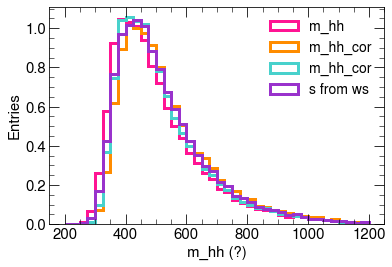

In [51]:
# Default bins in Sean's limit setting script
nb=40
r=(200,1200)

s,e,_ = plt.hist(sdf.loc[(sdf.ntag_pag==4) & (sdf.kinematic_region==0),'m_hh'],
                 nb,r,color='deeppink',lw=3,histtype='step',label='m_hh',
                 weights=sdf.loc[(sdf.ntag_pag==4) & (sdf.kinematic_region==0),'mc_sf'])

plt.hist(sdf.loc[(sdf.ntag_pag==4) & (sdf.kinematic_region==0),'m_hh_cor'],
                 nb,r,color='darkorange',lw=3,histtype='step',label='m_hh_cor',
                 weights=sdf.loc[(sdf.ntag_pag==4) & (sdf.kinematic_region==0),'mc_sf'])


plt.hist(sdf.loc[(sdf.ntag_pag==4) & (sdf.kinematic_region==0),'m_hh_cor2'],
                 nb,r,color='mediumturquoise',lw=3,histtype='step',label='m_hh_cor',
                 weights=sdf.loc[(sdf.ntag_pag==4) & (sdf.kinematic_region==0),'mc_sf'])


xx = 0.5 * (e[:-1] + e[1:])
plt.hist(xx,nb,r,color='darkorchid',lw=3,histtype='step',label='s from ws',
         weights=ws_s)

plt.xlabel('m_hh (?)')
plt.ylabel('Entries')
plt.legend()
plt.show()



Since these 2 definitions are v similar I'm dubious it's due to a missing cut, seems more likely to be some discrepancy with the `m_hh` defintions (or a binning discrepancy?)

In [53]:
xlow,xhigh=r
n_bins=nb
np.linspace(xlow, xhigh, n_bins+1)


array([ 200.,  225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,
        425.,  450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,
        650.,  675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,
        875.,  900.,  925.,  950.,  975., 1000., 1025., 1050., 1075.,
       1100., 1125., 1150., 1175., 1200.])

In [54]:
e

array([ 200.,  225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,
        425.,  450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,
        650.,  675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,
        875.,  900.,  925.,  950.,  975., 1000., 1025., 1050., 1075.,
       1100., 1125., 1150., 1175., 1200.])

In [48]:
np.sum(s)

13.16654472838318

In [33]:
np.sum(ws_s)

11.566948437780324